<a href="https://colab.research.google.com/github/nahidosen/Group_5_CSE445_3_Spring_21/blob/main/ipynb/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
!pip install scikit-plot

In [361]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scikitplot as skplt
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [362]:
data = 'https://raw.githubusercontent.com/nahidosen/Group_5_CSE445_3_Spring_21/main/dataset/IPL%20Matches%202008-2020.csv'

ipl = pd.read_csv(data)
ipl

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [363]:
ipl.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [364]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [365]:
#ipl_2['city'] = ipl['city'].astype(str)
#ipl_2.info()

In [366]:
ipl.isnull().sum() 

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [367]:
ipl.nunique()

id                 816
city                32
date               596
player_of_match    233
venue               36
neutral_venue        2
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
result               3
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
dtype: int64

In [368]:
ipl['city'].value_counts().sort_index()

Abu Dhabi          29
Ahmedabad          12
Bangalore          65
Bengaluru          15
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         56
Chennai            57
Cuttack             7
Delhi              74
Dharamsala          9
Dubai              26
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            77
Mumbai            101
Nagpur              3
Port Elizabeth      7
Pune               38
Raipur              6
Rajkot             10
Ranchi              7
Sharjah            12
Visakhapatnam      13
Name: city, dtype: int64

In [369]:
ipl_2 = ipl
ipl_2['city'] = ipl_2['city'].replace('Bengaluru', 'Bangalore')
ipl_2['city'].value_counts().sort_index()

Abu Dhabi          29
Ahmedabad          12
Bangalore          80
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         56
Chennai            57
Cuttack             7
Delhi              74
Dharamsala          9
Dubai              26
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            77
Mumbai            101
Nagpur              3
Port Elizabeth      7
Pune               38
Raipur              6
Rajkot             10
Ranchi              7
Sharjah            12
Visakhapatnam      13
Name: city, dtype: int64

In [370]:
ipl_2['player_of_match'].sort_values().unique()

array(['A Chandila', 'A Kumble', 'A Mishra', 'A Nehra', 'A Nortje',
       'A Singh', 'A Symonds', 'A Zampa', 'AA Jhunjhunwala', 'AB Dinda',
       'AB de Villiers', 'AC Gilchrist', 'AC Voges', 'AD Mascarenhas',
       'AD Mathews', 'AD Russell', 'AJ Finch', 'AJ Tye', 'AM Rahane',
       'AP Tare', 'AR Patel', 'AS Joseph', 'AS Rajpoot', 'AT Rayudu',
       'Azhar Mahmood', 'B Kumar', 'B Lee', 'B Stanlake', 'BA Bhatt',
       'BA Stokes', 'BB McCullum', 'BCJ Cutting', 'BJ Hodge',
       'BW Hilfenhaus', 'CA Lynn', 'CH Gayle', 'CH Morris', 'CJ Anderson',
       'CJ Jordan', 'CL White', 'CR Brathwaite', 'CRD Fernando',
       'CV Varun', 'DA Miller', 'DA Warner', 'DE Bollinger', 'DJ Bravo',
       'DJ Hooda', 'DJ Hussey', 'DJG Sammy', 'DL Chahar', 'DL Vettori',
       'DP Nannes', 'DPMD Jayawardene', 'DR Smith', 'DW Steyn',
       'EJG Morgan', 'F du Plessis', 'G Gambhir', 'GC Smith',
       'GD McGrath', 'GH Vihari', 'GJ Bailey', 'GJ Maxwell', 'HF Gurney',
       'HH Gibbs', 'HH Pandya',

In [371]:
ipl_2['venue'].value_counts().sort_index()

Barabati Stadium                                         7
Brabourne Stadium                                       11
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
Dubai International Cricket Stadium                     33
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             9
Holkar Cricket Stadium                                   9
JSCA International Stadium Complex                       7
Kingsmead                                               15
M Chinnaswamy Stadium                                   65
M.Chinnaswamy Stadium                                   15
MA Chidambaram Stadium, Chepauk                         

In [372]:
ipl_2['venue'] = ipl_2['venue'].replace('M Chinnaswamy Stadium', 'M. Chinnaswamy Stadium')
ipl_2['venue'].value_counts().sort_index()

Barabati Stadium                                         7
Brabourne Stadium                                       11
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
Dubai International Cricket Stadium                     33
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             9
Holkar Cricket Stadium                                   9
JSCA International Stadium Complex                       7
Kingsmead                                               15
M. Chinnaswamy Stadium                                  65
M.Chinnaswamy Stadium                                   15
MA Chidambaram Stadium, Chepauk                         

In [373]:
ipl_2['venue'] = ipl_2['venue'].replace('M.Chinnaswamy Stadium', 'M. Chinnaswamy Stadium')
ipl_2['venue'].value_counts().sort_index()

Barabati Stadium                                         7
Brabourne Stadium                                       11
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
Dubai International Cricket Stadium                     33
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             9
Holkar Cricket Stadium                                   9
JSCA International Stadium Complex                       7
Kingsmead                                               15
M. Chinnaswamy Stadium                                  80
MA Chidambaram Stadium, Chepauk                         57
Maharashtra Cricket Association Stadium                 

In [374]:
ipl_2['venue'] = ipl_2['venue'].replace('Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali')
ipl_2['venue'].value_counts().sort_index()

Barabati Stadium                                         7
Brabourne Stadium                                       11
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
Dubai International Cricket Stadium                     33
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             9
Holkar Cricket Stadium                                   9
JSCA International Stadium Complex                       7
Kingsmead                                               15
M. Chinnaswamy Stadium                                  80
MA Chidambaram Stadium, Chepauk                         57
Maharashtra Cricket Association Stadium                 

In [375]:
ipl_2['neutral_venue'].value_counts().sort_index()

0    739
1     77
Name: neutral_venue, dtype: int64

In [376]:
ipl_2['team1'].value_counts().sort_index()

Chennai Super Kings             94
Deccan Chargers                 39
Delhi Capitals                  19
Delhi Daredevils                83
Gujarat Lions                   16
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders           95
Mumbai Indians                  97
Pune Warriors                   23
Rajasthan Royals                70
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Royal Challengers Bangalore    108
Sunrisers Hyderabad             59
Name: team1, dtype: int64

In [377]:
ipl_2 = ipl_2.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
ipl_2['team1'].value_counts().sort_index()

Chennai Super Kings             94
Deccan Chargers                 39
Delhi Capitals                  19
Delhi Daredevils                83
Gujarat Lions                   16
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders           95
Mumbai Indians                  97
Pune Warriors                   23
Rajasthan Royals                70
Rising Pune Supergiant          14
Royal Challengers Bangalore    108
Sunrisers Hyderabad             59
Name: team1, dtype: int64

In [378]:
ipl_2['team2'].value_counts().sort_index()

Chennai Super Kings             84
Deccan Chargers                 36
Delhi Capitals                  14
Delhi Daredevils                78
Gujarat Lions                   14
Kings XI Punjab                 98
Kochi Tuskers Kerala             7
Kolkata Knight Riders           97
Mumbai Indians                 106
Pune Warriors                   23
Rajasthan Royals                91
Rising Pune Supergiant          16
Royal Challengers Bangalore     87
Sunrisers Hyderabad             65
Name: team2, dtype: int64

In [379]:
ipl_2['toss_winner'].value_counts().sort_index()

Chennai Super Kings             97
Deccan Chargers                 43
Delhi Capitals                  20
Delhi Daredevils                80
Gujarat Lions                   15
Kings XI Punjab                 85
Kochi Tuskers Kerala             8
Kolkata Knight Riders           98
Mumbai Indians                 106
Pune Warriors                   20
Rajasthan Royals                87
Rising Pune Supergiant          13
Royal Challengers Bangalore     87
Sunrisers Hyderabad             57
Name: toss_winner, dtype: int64

In [380]:
ipl_2['toss_decision'].value_counts().sort_index()

bat      320
field    496
Name: toss_decision, dtype: int64

In [381]:
ipl_2['winner'].value_counts().sort_index()

Chennai Super Kings            106
Deccan Chargers                 29
Delhi Capitals                  19
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders           99
Mumbai Indians                 120
Pune Warriors                   12
Rajasthan Royals                81
Rising Pune Supergiant          15
Royal Challengers Bangalore     91
Sunrisers Hyderabad             66
Name: winner, dtype: int64

In [382]:
ipl_2['result'].value_counts().sort_index()

runs       364
tie         13
wickets    435
Name: result, dtype: int64

In [383]:
ipl_2['result_margin'].value_counts()

6.0      95
7.0      94
5.0      85
8.0      67
4.0      53
         ..
76.0      1
88.0      1
67.0      1
36.0      1
140.0     1
Name: result_margin, Length: 91, dtype: int64

In [384]:
ipl_2['eliminator'].value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

In [385]:
ipl_2['method'].value_counts()

D/L    19
Name: method, dtype: int64

In [386]:
ipl_2['umpire1'].value_counts().sort_index()

A Deshmukh                5
A Nand Kishore           14
AK Chaudhary             56
AM Saheba                 3
AV Jayaprakash            2
AY Dandekar              28
Aleem Dar                38
Asad Rauf                51
BF Bowden                37
BG Jerling               13
BNJ Oxenford             16
BR Doctrove              34
C Shamshuddin            22
CB Gaffaney              34
CK Nandan                 8
DJ Harper                 9
GAV Baxter                7
HDPK Dharmasena          78
IJ Gould                  3
IL Howell                 7
JD Cloete                16
K Bharatan                3
K Hariharan              10
K Srinath                 2
KN Ananthapadmanabhan    33
M Erasmus                40
MR Benson                10
NJ Llong                 21
Nitin Menon              20
PG Pathak                 4
PR Reiffel                5
RE Koertzen              20
RJ Tucker                 5
RK Illingworth           13
RM Deshpande              7
S Asnani            

In [387]:
ipl_2['umpire2'].value_counts().sort_index()

A Deshmukh          7
A Nand Kishore     11
AK Chaudhary       31
AL Hill             6
AM Saheba          23
AV Jayaprakash      4
BG Jerling          4
BNJ Oxenford       32
BR Doctrove         8
C Shamshuddin      60
CB Gaffaney        13
CK Nandan          49
DJ Harper          18
GA Pratapkumar      6
HDPK Dharmasena    16
I Shivram           6
IJ Gould            3
IL Howell           7
JD Cloete           1
K Hariharan        11
K Srinath          13
K Srinivasan        6
M Erasmus          25
MR Benson           2
NJ Llong           16
Nitin Menon        37
PG Pathak           7
PR Reiffel         19
RB Tiffin          30
RE Koertzen        21
RJ Tucker          41
RK Illingworth     18
S Asnani           11
S Das               5
S Ravi             84
SD Fry              1
SD Ranade           2
SJ Davis            1
SJA Taufel         54
SK Tarapore        26
SL Shastri         13
SS Hazare           6
Subroto Das         1
TH Wijewardene      5
VA Kulkarni        31
VK Sharma 

In [388]:
ipl_2 = ipl_2.drop_duplicates(keep = 'first')
ipl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [389]:
ipl_3 = ipl_2
ipl_3 = ipl_3.drop(['id'], axis = 1)
ipl_3 = ipl_3.drop(['player_of_match'], axis = 1)
ipl_3 = ipl_3.drop(['result'], axis = 1)
ipl_3 = ipl_3.drop(['result_margin'], axis = 1)
ipl_3 = ipl_3.drop(['method'], axis = 1)
ipl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           803 non-null    object
 1   date           816 non-null    object
 2   venue          816 non-null    object
 3   neutral_venue  816 non-null    int64 
 4   team1          816 non-null    object
 5   team2          816 non-null    object
 6   toss_winner    816 non-null    object
 7   toss_decision  816 non-null    object
 8   winner         812 non-null    object
 9   eliminator     812 non-null    object
 10  umpire1        816 non-null    object
 11  umpire2        816 non-null    object
dtypes: int64(1), object(11)
memory usage: 82.9+ KB


In [390]:
ipl_3['winner'].fillna('Tie', inplace=True)
ipl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           803 non-null    object
 1   date           816 non-null    object
 2   venue          816 non-null    object
 3   neutral_venue  816 non-null    int64 
 4   team1          816 non-null    object
 5   team2          816 non-null    object
 6   toss_winner    816 non-null    object
 7   toss_decision  816 non-null    object
 8   winner         816 non-null    object
 9   eliminator     812 non-null    object
 10  umpire1        816 non-null    object
 11  umpire2        816 non-null    object
dtypes: int64(1), object(11)
memory usage: 82.9+ KB


In [391]:
ipl_3[ipl_3['eliminator'].isnull() == True]

,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
241,Delhi,2011-05-21,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,Tie,NaN,SS Hazare,RJ Tucker
486,Bangalore,2015-04-29,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Tie,NaN,JD Cloete,PG Pathak
511,Bangalore,2015-05-17,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Tie,NaN,HDPK Dharmasena,K Srinivasan
744,Bangalore,2019-04-30,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Tie,NaN,UV Gandhe,NJ Llong


In [392]:
ipl_3['eliminator'].fillna('N', inplace=True)
ipl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           803 non-null    object
 1   date           816 non-null    object
 2   venue          816 non-null    object
 3   neutral_venue  816 non-null    int64 
 4   team1          816 non-null    object
 5   team2          816 non-null    object
 6   toss_winner    816 non-null    object
 7   toss_decision  816 non-null    object
 8   winner         816 non-null    object
 9   eliminator     816 non-null    object
 10  umpire1        816 non-null    object
 11  umpire2        816 non-null    object
dtypes: int64(1), object(11)
memory usage: 82.9+ KB


In [393]:
ipl_3[ipl_3['city'].isnull() == True]

,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
399,NaN,2014-04-17,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,N,Aleem Dar,S Ravi
402,NaN,2014-04-19,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,N,Aleem Dar,AK Chaudhary
403,NaN,2014-04-19,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,N,Aleem Dar,VA Kulkarni
404,NaN,2014-04-20,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,N,BF Bowden,M Erasmus
406,NaN,2014-04-22,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,N,M Erasmus,S Ravi
407,NaN,2014-04-23,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,N,HDPK Dharmasena,RK Illingworth
408,NaN,2014-04-24,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Aleem Dar,VA Kulkarni
409,NaN,2014-04-25,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,N,M Erasmus,S Ravi
410,NaN,2014-04-25,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,N,BF Bowden,M Erasmus
413,NaN,2014-04-27,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,N,Aleem Dar,VA Kulkarni


In [394]:
ipl_3[(ipl_3['city'].isnull() == True) & (ipl_3['venue'] == 'Sharjah Cricket Stadium')]

,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
399,NaN,2014-04-17,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,N,Aleem Dar,S Ravi
404,NaN,2014-04-20,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,N,BF Bowden,M Erasmus
406,NaN,2014-04-22,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,N,M Erasmus,S Ravi
408,NaN,2014-04-24,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Aleem Dar,VA Kulkarni
413,NaN,2014-04-27,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,N,Aleem Dar,VA Kulkarni
414,NaN,2014-04-27,Sharjah Cricket Stadium,1,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,N,AK Chaudhary,VA Kulkarni


In [395]:
ipl_3['city'] = np.where((ipl_3['city'].isnull() == True) & (ipl_3['venue'] == 'Sharjah Cricket Stadium'), 'Sharjah', ipl_3['city'])
ipl_3[ipl_3.index == 399]

,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
399,Sharjah,2014-04-17,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,N,Aleem Dar,S Ravi


In [396]:
ipl_3[(ipl_3['city'].isnull() == True) & (ipl_3['venue'] == 'Dubai International Cricket Stadium')]

,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
402,NaN,2014-04-19,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,N,Aleem Dar,AK Chaudhary
403,NaN,2014-04-19,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,N,Aleem Dar,VA Kulkarni
407,NaN,2014-04-23,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,N,HDPK Dharmasena,RK Illingworth
409,NaN,2014-04-25,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,N,M Erasmus,S Ravi
410,NaN,2014-04-25,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,N,BF Bowden,M Erasmus
415,NaN,2014-04-28,Dubai International Cricket Stadium,1,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,N,BF Bowden,S Ravi
417,NaN,2014-04-30,Dubai International Cricket Stadium,1,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,field,Sunrisers Hyderabad,N,HDPK Dharmasena,M Erasmus


In [397]:
ipl_3['city'] = np.where((ipl_3['city'].isnull() == True) & (ipl_3['venue'] == 'Dubai International Cricket Stadium'), 'Dubai', ipl_3['city'])
ipl_3[ipl_3.index == 407]

,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
407,Dubai,2014-04-23,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,N,HDPK Dharmasena,RK Illingworth


In [398]:
ipl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           816 non-null    object
 1   date           816 non-null    object
 2   venue          816 non-null    object
 3   neutral_venue  816 non-null    int64 
 4   team1          816 non-null    object
 5   team2          816 non-null    object
 6   toss_winner    816 non-null    object
 7   toss_decision  816 non-null    object
 8   winner         816 non-null    object
 9   eliminator     816 non-null    object
 10  umpire1        816 non-null    object
 11  umpire2        816 non-null    object
dtypes: int64(1), object(11)
memory usage: 82.9+ KB


In [399]:
ipl_3['date'] = pd.to_datetime(ipl_3['date'])
ipl_3['year'] = ipl_3['date'].dt.year
ipl_3['month'] = ipl_3['date'].dt.month
ipl_3['day'] = ipl_3['date'].dt.day
ipl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   city           816 non-null    object        
 1   date           816 non-null    datetime64[ns]
 2   venue          816 non-null    object        
 3   neutral_venue  816 non-null    int64         
 4   team1          816 non-null    object        
 5   team2          816 non-null    object        
 6   toss_winner    816 non-null    object        
 7   toss_decision  816 non-null    object        
 8   winner         816 non-null    object        
 9   eliminator     816 non-null    object        
 10  umpire1        816 non-null    object        
 11  umpire2        816 non-null    object        
 12  year           816 non-null    int64         
 13  month          816 non-null    int64         
 14  day            816 non-null    int64         
dtypes: datetime64[ns](1), i

In [400]:
print(min(ipl_3['date']))
print(max(ipl_3['date']))

2008-04-18 00:00:00
2020-11-10 00:00:00


In [401]:
ipl_4 = ipl_3
ipl_4 = ipl_4.drop(['date'], axis = 1)
ipl_4

,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2,year,month,day
0,Bangalore,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Asad Rauf,RE Koertzen,2008,4,18
1,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N,MR Benson,SL Shastri,2008,4,19
2,Delhi,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,N,Aleem Dar,GA Pratapkumar,2008,4,19
3,Mumbai,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,N,SJ Davis,DJ Harper,2008,4,20
4,Kolkata,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,N,BF Bowden,K Hariharan,2008,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,Y,Nitin Menon,PR Reiffel,2020,9,28
812,Dubai,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,N,CB Gaffaney,Nitin Menon,2020,11,5
813,Abu Dhabi,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,N,PR Reiffel,S Ravi,2020,11,6
814,Abu Dhabi,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,N,PR Reiffel,S Ravi,2020,11,8


In [402]:
ipl_4.columns

Index(['city', 'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'eliminator', 'umpire1', 'umpire2', 'year',
       'month', 'day'],
      dtype='object')

In [403]:
ipl_4 = ipl_4[['year', 'month', 'day', 'city', 'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'eliminator', 'umpire1', 'umpire2']]
ipl_4

,year,month,day,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
0,2008,4,18,Bangalore,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Asad Rauf,RE Koertzen
1,2008,4,19,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N,MR Benson,SL Shastri
2,2008,4,19,Delhi,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,N,Aleem Dar,GA Pratapkumar
3,2008,4,20,Mumbai,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,N,SJ Davis,DJ Harper
4,2008,4,20,Kolkata,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2020,9,28,Dubai,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,Y,Nitin Menon,PR Reiffel
812,2020,11,5,Dubai,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,N,CB Gaffaney,Nitin Menon
813,2020,11,6,Abu Dhabi,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,N,PR Reiffel,S Ravi
814,2020,11,8,Abu Dhabi,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,N,PR Reiffel,S Ravi


In [404]:
ipl_4.columns

Index(['year', 'month', 'day', 'city', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'eliminator',
       'umpire1', 'umpire2'],
      dtype='object')

In [405]:
ipl_4['team1'].sort_values().unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [406]:
ipl_4['team2'].sort_values().unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [407]:
ipl_4['toss_winner'].sort_values().unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [408]:
ipl_4['winner'].sort_values().unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Tie'],
      dtype=object)

In [409]:
ipl_5 = ipl_4
ipl_5

,year,month,day,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
0,2008,4,18,Bangalore,M. Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Asad Rauf,RE Koertzen
1,2008,4,19,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,N,MR Benson,SL Shastri
2,2008,4,19,Delhi,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,N,Aleem Dar,GA Pratapkumar
3,2008,4,20,Mumbai,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,N,SJ Davis,DJ Harper
4,2008,4,20,Kolkata,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2020,9,28,Dubai,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,Y,Nitin Menon,PR Reiffel
812,2020,11,5,Dubai,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,N,CB Gaffaney,Nitin Menon
813,2020,11,6,Abu Dhabi,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,N,PR Reiffel,S Ravi
814,2020,11,8,Abu Dhabi,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,N,PR Reiffel,S Ravi


In [410]:
# Creating Dictionaries

team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala': 12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Tie': 15
}

team_encode_dict = {
    'team1': team_encodings,
    'team2': team_encodings,
    'toss_winner': team_encodings,
    'winner': team_encodings
}

ipl_5.replace(team_encode_dict, inplace=True)
ipl_5

,year,month,day,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
0,2008,4,18,Bangalore,M. Chinnaswamy Stadium,0,3,2,3,field,2,N,Asad Rauf,RE Koertzen
1,2008,4,19,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ...",0,9,5,5,bat,5,N,MR Benson,SL Shastri
2,2008,4,19,Delhi,Feroz Shah Kotla,0,7,6,6,bat,7,N,Aleem Dar,GA Pratapkumar
3,2008,4,20,Mumbai,Wankhede Stadium,0,1,3,1,bat,3,N,SJ Davis,DJ Harper
4,2008,4,20,Kolkata,Eden Gardens,0,2,4,4,bat,2,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2020,9,28,Dubai,Dubai International Cricket Stadium,0,3,1,1,field,3,Y,Nitin Menon,PR Reiffel
812,2020,11,5,Dubai,Dubai International Cricket Stadium,0,1,14,14,field,1,N,CB Gaffaney,Nitin Menon
813,2020,11,6,Abu Dhabi,Sheikh Zayed Stadium,0,3,10,10,field,10,N,PR Reiffel,S Ravi
814,2020,11,8,Abu Dhabi,Sheikh Zayed Stadium,0,14,10,14,bat,14,N,PR Reiffel,S Ravi


In [411]:
ipl_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           816 non-null    int64 
 1   month          816 non-null    int64 
 2   day            816 non-null    int64 
 3   city           816 non-null    object
 4   venue          816 non-null    object
 5   neutral_venue  816 non-null    int64 
 6   team1          816 non-null    int64 
 7   team2          816 non-null    int64 
 8   toss_winner    816 non-null    int64 
 9   toss_decision  816 non-null    object
 10  winner         816 non-null    int64 
 11  eliminator     816 non-null    object
 12  umpire1        816 non-null    object
 13  umpire2        816 non-null    object
dtypes: int64(8), object(6)
memory usage: 95.6+ KB


In [412]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'venue', 'toss_decision', 'eliminator', 'umpire1', 'umpire2']
encoder = LabelEncoder()
for ftr in ftr_list:
    ipl_5[ftr] = encoder.fit_transform(ipl_5[ftr])
    print(encoder.classes_)

ipl_5

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bloemfontein' 'Cape Town'
 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi' 'Dharamsala' 'Dubai'
 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur' 'Johannesburg'
 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mumbai' 'Nagpur' 'Port Elizabeth'
 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah' 'Visakhapatnam']
['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Rajiv Gandhi International Stadium, Uppal'
 'Sardar

,year,month,day,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,eliminator,umpire1,umpire2
0,2008,4,18,2,14,0,3,2,3,1,2,0,7,29
1,2008,4,19,6,21,0,9,5,5,0,5,0,26,40
2,2008,4,19,9,8,0,7,6,6,0,7,0,6,13
3,2008,4,20,22,33,0,1,3,1,0,3,0,39,12
4,2008,4,20,21,7,0,2,4,4,0,2,0,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2020,9,28,11,6,0,3,1,1,1,3,1,28,27
812,2020,11,5,11,6,0,1,14,14,1,1,0,13,25
813,2020,11,6,0,28,0,3,10,10,1,10,0,30,34
814,2020,11,8,0,28,0,14,10,14,0,14,0,30,34


In [413]:
ipl_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           816 non-null    int64
 1   month          816 non-null    int64
 2   day            816 non-null    int64
 3   city           816 non-null    int64
 4   venue          816 non-null    int64
 5   neutral_venue  816 non-null    int64
 6   team1          816 non-null    int64
 7   team2          816 non-null    int64
 8   toss_winner    816 non-null    int64
 9   toss_decision  816 non-null    int64
 10  winner         816 non-null    int64
 11  eliminator     816 non-null    int64
 12  umpire1        816 non-null    int64
 13  umpire2        816 non-null    int64
dtypes: int64(14)
memory usage: 95.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c39dfe10>,
      dtype=object)

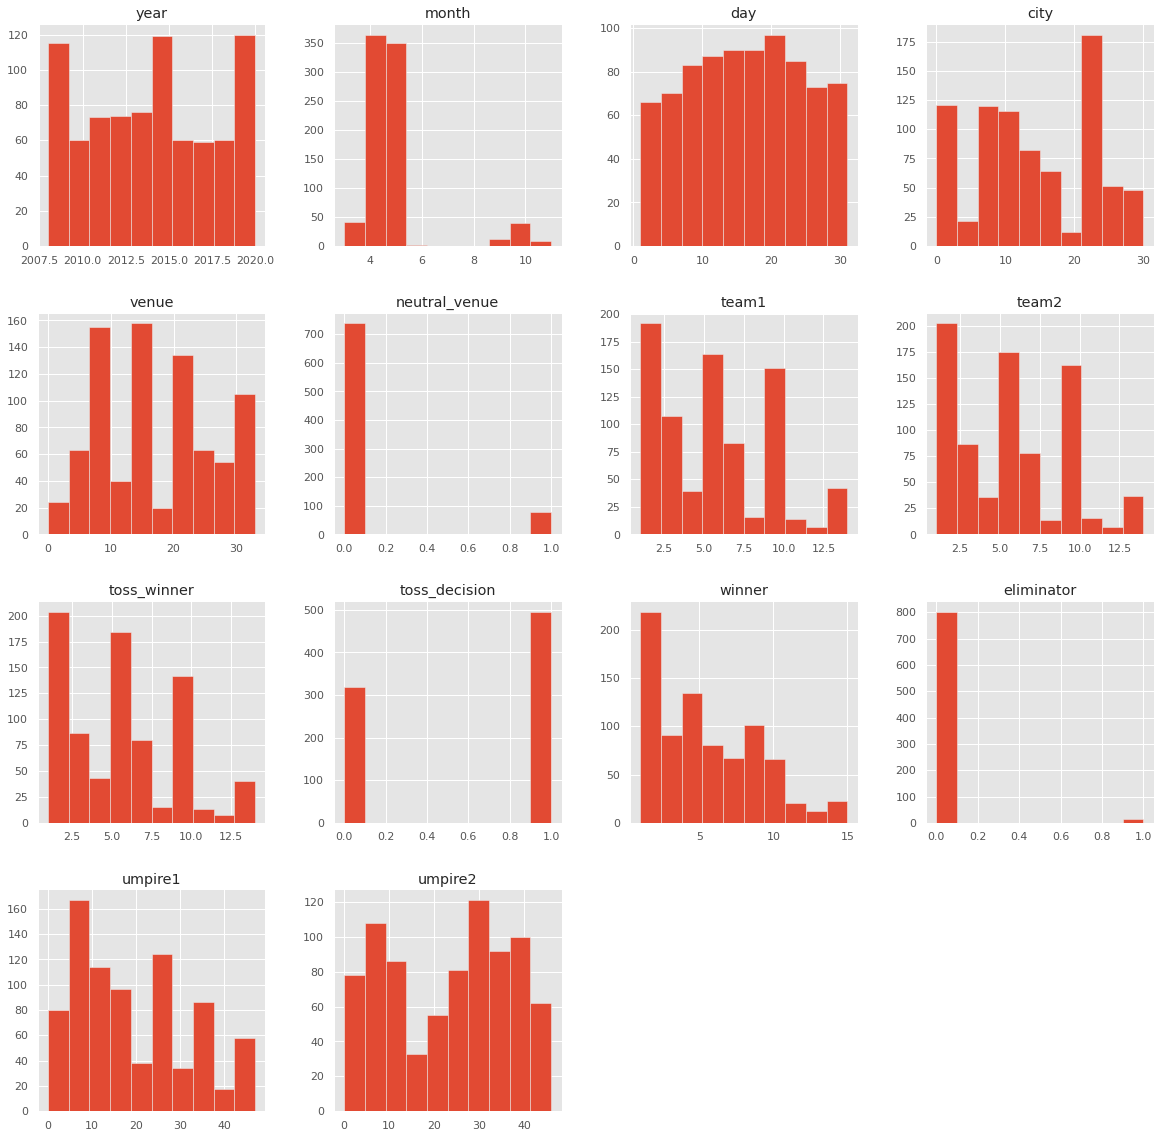

In [414]:
ipl_5.hist(figsize = (20,20))

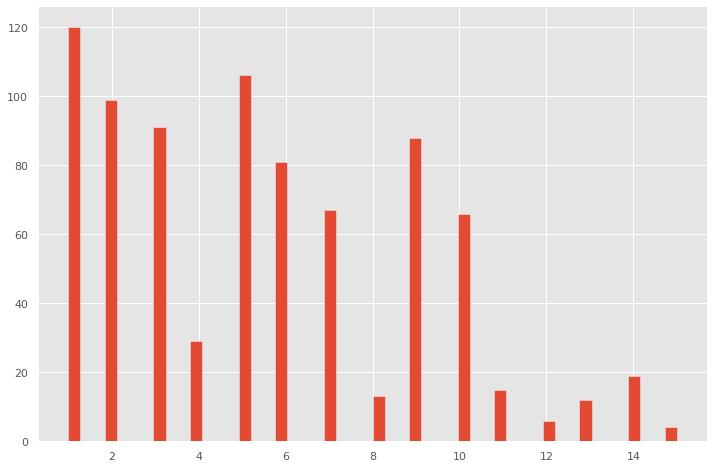

In [415]:
ipl_5['winner'].hist(bins=50)

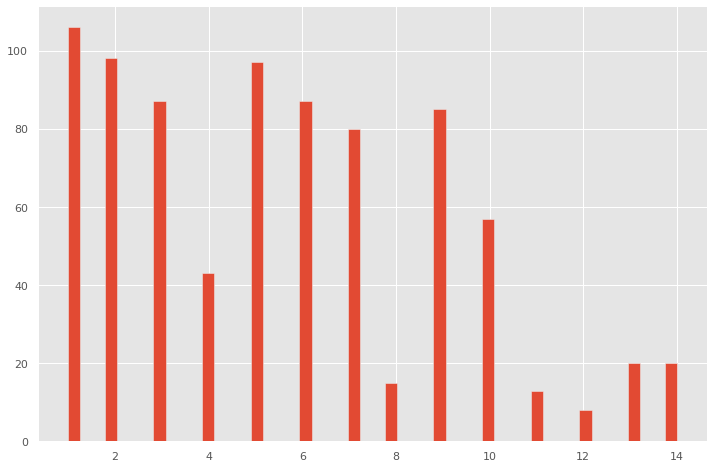

In [416]:
ipl_5['toss_winner'].hist(bins=50)

In [417]:
ipl_5.isnull().sum()

year             0
month            0
day              0
city             0
venue            0
neutral_venue    0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
eliminator       0
umpire1          0
umpire2          0
dtype: int64

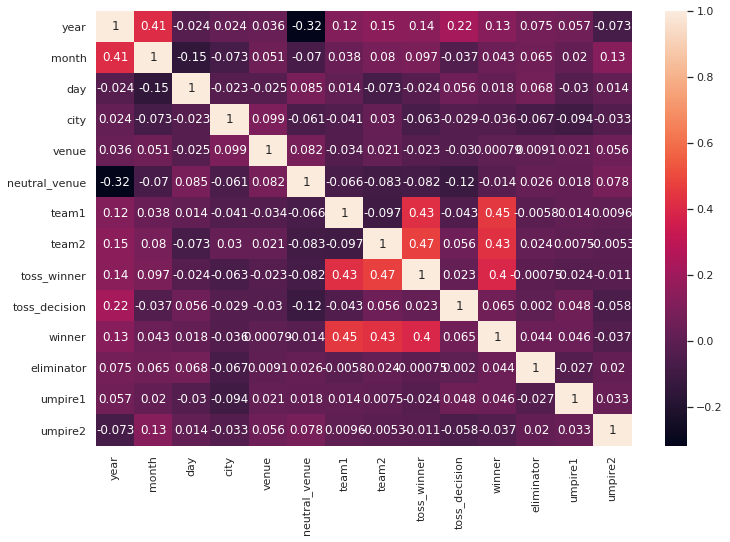

In [418]:
# Confusion Matrix

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})
ax = sns.heatmap(ipl_5.corr(), annot=True)

In [419]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold and i!=j:
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [420]:
corr_columns = correlation(ipl_5, 0.1)
corr_columns = list(dict.fromkeys(corr_columns))
corr_columns

['month',
 'day',
 'neutral_venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'umpire2']

In [421]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ipl_5, test_size=0.2, random_state=5)

print(train_df.columns)
print(train_df.shape)

print(test_df.columns)
print(test_df.shape)

Index(['year', 'month', 'day', 'city', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'eliminator',
       'umpire1', 'umpire2'],
      dtype='object')
(652, 14)
Index(['year', 'month', 'day', 'city', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'eliminator',
       'umpire1', 'umpire2'],
      dtype='object')
(164, 14)


In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def print_model_scores(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    predictions = model.predict(data[predictor])
    accuracy = accuracy_score(predictions, data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    scores = cross_val_score(model, data[predictor], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE: {np.sqrt(-scores).mean()}')

In [423]:
# Logistic Regression

target_var = ["winner"]
predictor_var = ['year', 'month', 'day', 'city', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'eliminator',
       'umpire1', 'umpire2']
model = LogisticRegression()

print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.3
Cross-Validation Scores: [4.04082223 3.79533663 4.01918476 3.88191071 3.5970073 ]
Average RMSE: 3.866852327291803


In [424]:
# Random Forest Classifier

model = RandomForestClassifier()

print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 1.0
Cross-Validation Scores: [3.96357461 3.62560866 3.44852254 3.73651421 3.33973744]
Average RMSE: 3.62279149134212


In [425]:
train_df.columns

Index(['year', 'month', 'day', 'city', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'eliminator',
       'umpire1', 'umpire2'],
      dtype='object')

In [426]:
ipl['neutral_venue'].value_counts().sort_index()

0    739
1     77
Name: neutral_venue, dtype: int64

In [427]:
ipl['eliminator'].value_counts().sort_index()

N    799
Y     13
Name: eliminator, dtype: int64

In [471]:
ipl['toss_decision'].value_counts().sort_index()

bat      320
field    496
Name: toss_decision, dtype: int64

[2012, 5, 20, 14, 22, 0, 4, 3, 3, 1, 4, 0, 37, 38]


In [541]:
# Sample Test
import re
t = test_df.sample().to_numpy().tolist()
t = str(t)[1:-1]
temp = re.findall(r'\d+', t)
res = list(map(int, temp))

year, month, day, city, venue, neutral_venue, team1, team2, toss_winner, toss_decision, winner, eliminator, umpire1, umpire2 = res

inp = [year,
       month,
       day,
       city,
       venue,
       neutral_venue,
       team1,
       team2,
       toss_winner,
       toss_decision,
       eliminator,
       umpire1,
       umpire2,
]

print(inp)
inp = np.array(inp).reshape((1, -1))
print(inp)
output = model.predict(inp)
print(output)
print(f"team1: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(team1)]}")
print(f"team2: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(team2)]}")
print(f"Actual winner is: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(winner)]}")
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[2010, 3, 28, 1, 23, 0, 6, 5, 6, 0, 0, 43, 38]
[[2010    3   28    1   23    0    6    5    6    0    0   43   38]]
[6]
team1: Rajasthan Royals
team2: Chennai Super Kings
Actual winner is: Rajasthan Royals
The winner would be: Rajasthan Royals


In [542]:
pd.Series(index=predictor_var, data=model.feature_importances_)

year             0.081041
month            0.039925
day              0.103774
city             0.078880
venue            0.085951
neutral_venue    0.011963
team1            0.139838
team2            0.128586
toss_winner      0.116149
toss_decision    0.023555
eliminator       0.003065
umpire1          0.093497
umpire2          0.093775
dtype: float64